In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('plane.jpg',cv2.IMREAD_GRAYSCALE)

In [12]:
type(image)

numpy.ndarray

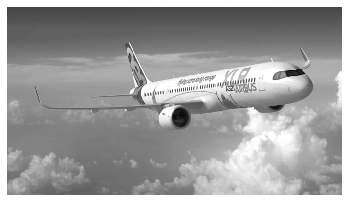

In [13]:
plt.imshow(image,cmap = 'gray'),plt.axis('off')
plt.show()

In [14]:
image

array([[ 68,  68,  68, ...,  71,  71,  71],
       [ 68,  68,  68, ...,  71,  71,  71],
       [ 68,  68,  68, ...,  71,  71,  71],
       ...,
       [137, 136, 136, ..., 132, 128, 123],
       [136, 136, 136, ..., 123, 120, 115],
       [136, 136, 136, ..., 117, 114, 110]], dtype=uint8)

In [16]:
image.shape

(381, 678)

In [17]:
image[0,0]

68

In [18]:
image_bgr = cv2.imread('plane.jpg',cv2.IMREAD_COLOR)

image_bgr[0,0]

array([157,  74,  22], dtype=uint8)

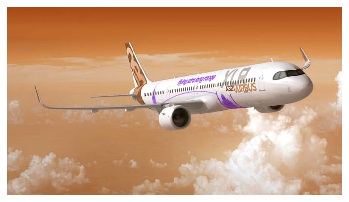

In [19]:
plt.imshow(image_bgr),plt.axis('off')
plt.show()

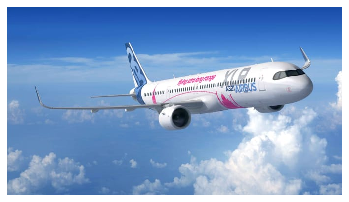

In [20]:
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb), plt.axis('off')
plt.show()

### 이미지 저장하기

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('plane.jpg',cv2.IMREAD_GRAYSCALE)

cv2.imwrite('plane_new.jpg',image)

True

### 이미지 크기 변경하기

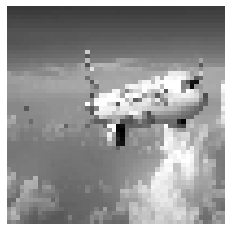

In [23]:
image = cv2.imread('plane.jpg',cv2.IMREAD_GRAYSCALE)

image_50x50 = cv2.resize(image,(50,50))

plt.imshow(image_50x50, cmap = 'gray'), plt.axis('off')
plt.show()

### 이미지 자르기

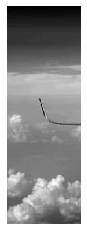

In [25]:
image_cropped = image[:,:128]

plt.imshow(image_cropped, cmap = 'gray'), plt.axis('off')
plt.show()

### 이미지 흐리게 하기

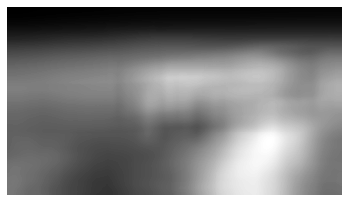

In [28]:
image_blurry = cv2.blur(image,(100,100))

plt.imshow(image_blurry, cmap = 'gray'),plt.axis('off')
plt.show()

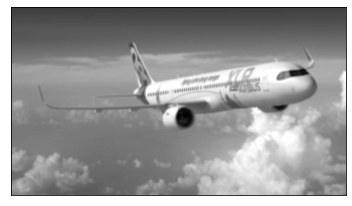

In [30]:
kernel = np.ones((5,5))/25.0

image_kernel = cv2.filter2D(image,-1,kernel)

plt.imshow(image_kernel, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

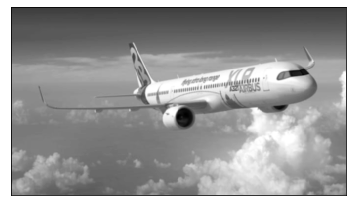

In [32]:
image_very_blurry = cv2.GaussianBlur(image,(5,5),0)

plt.imshow(image_very_blurry, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

### 이미지 선명하게 하기

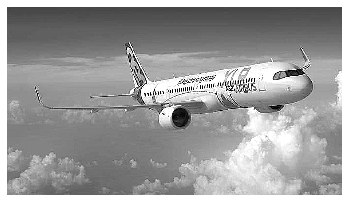

In [33]:
kernel = np.array([[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]])
image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp, cmap = 'gray'), plt.axis('off')
plt.show()

In [34]:
image = cv2.imread('blurr_image.jpg',cv2.IMREAD_GRAYSCALE)

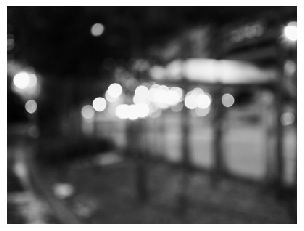

In [36]:
plt.imshow(image, cmap = 'gray'), plt.axis('off')
plt.show()

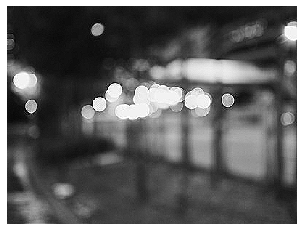

In [44]:
kernel = np.array([[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]])
image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp, cmap = 'gray'), plt.axis('off')
plt.show()

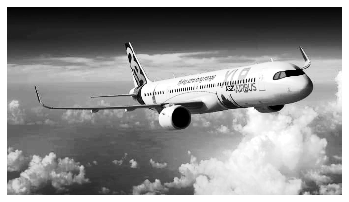

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('plane.jpg',cv2.IMREAD_GRAYSCALE)

image_enhanced = cv2.equalizeHist(image)

plt.imshow(image_enhanced, cmap = 'gray'), plt.axis('off')
plt.show()

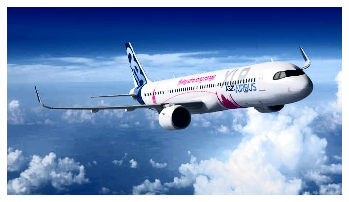

In [46]:
image_bgr = cv2.imread('plane.jpg')
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(image_rgb), plt.axis('off')
plt.show()

### 색깔 구분하기

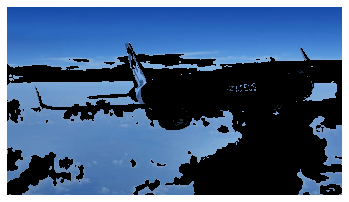

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('plane.jpg')

image_hsv = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2HSV)

lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask = mask)

image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb), plt.axis('off')
plt.show()

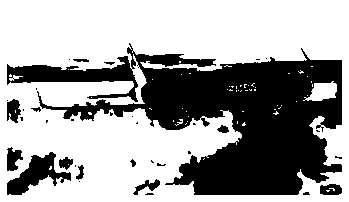

In [48]:
plt.imshow(mask,cmap = 'gray'), plt.axis('off')
plt.show()

### 이미지 이진화하기

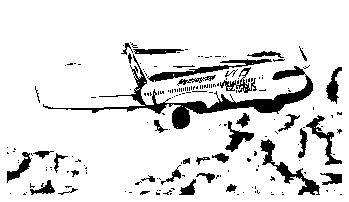

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_grey = cv2.imread('plane.jpg',cv2.IMREAD_GRAYSCALE)

max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey, max_output_value,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,neighborhood_size,subtract_from_mean)

plt.imshow(image_binarized,cmap= 'gray'),plt.axis('off')
plt.show()

In [52]:
image_mean_threshold = cv2.adaptiveThreshold(image_grey, max_output_value,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,neighborhood_size,subtract_from_mean)

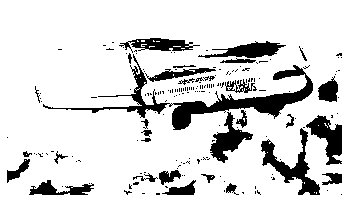

In [53]:
plt.imshow(image_mean_threshold,cmap = 'gray'), plt.axis('off')
plt.show()

### 배경 제거하기

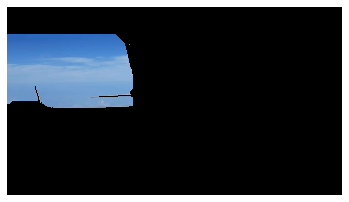

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('plane.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

rectangle = (0,56,256, 150)

mask = np.zeros(image_rgb.shape[:2],np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

cv2.grabCut(image_rgb, mask, rectangle, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mask == 2) | (mask == 0),0,1).astype('uint8')

image_rgb_nobg = image_rgb * mask_2[:,:,np.newaxis]

plt.imshow(image_rgb_nobg), plt.axis('off')
plt.show()

### 경계선 감지하기

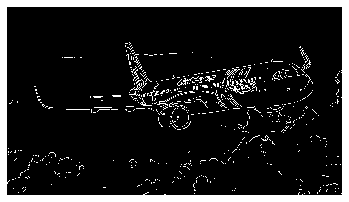

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_gray = cv2.imread('plane.jpg',cv2.IMREAD_GRAYSCALE)

median_intensity = np.median(image_gray)

lower_threshold = int(max(0,(1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255,(1.0 - 0.33) * median_intensity))

image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap='gray'), plt.axis('off')
plt.show()

### 모서리 감지하기

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('plane.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_gray = np.float32(image_gray)

block_size = 2
aperture = 29
free_parameter = 0.04

detector_response = cv2.cornerHarris(image_gray, block_size, aperture, free_parameter)

detector_responses = cv2.dilate(detector_responses, None)

threshold = 0.02

image_bgr[detector_responses > threshold * detector_responses.max()] = [255,255,255]

plt.imshow(image_gray, cmap = 'gray'), plt.axis('off')
plt.show()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-2b5g8ysb\opencv\modules\imgproc\src\corner.cpp:254: error: (-215:Assertion failed) src.type() == CV_8UC1 || src.type() == CV_32FC1 in function 'cv::cornerEigenValsVecs'


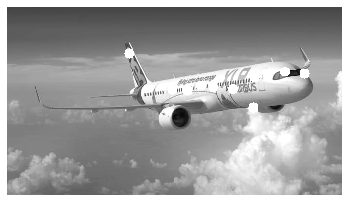

In [58]:
image_bgr = cv2.imread('plane.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(image_gray, corners_to_detect, minimum_quality_score,minimum_distance)

forners = np.float32(corners)

for corner in corners:
    x,y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255),-1)
    
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image_rgb,cmap = 'gray'), plt.axis('off')
plt.show()

### 머신러닝 특성 만들기

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('plane.jpg',cv2.IMREAD_GRAYSCALE)

image_10x10 = cv2.resize(image,(10,10))

image_10x10.flatten()

array([ 78,  77,  78,  78,  79,  78,  79,  78,  79,  79,  94,  96,  98,
        99, 102, 103, 104, 104, 105, 105, 117, 120, 125, 128, 136, 162,
       139, 137, 139, 137, 163, 164, 172, 172, 173, 174, 245, 254,  35,
       174, 143, 148, 152, 153, 254, 241, 219, 210, 172, 158, 147, 141,
       170, 148, 109, 110, 115, 119, 200, 172, 126, 129, 126, 129, 135,
       137, 185, 238, 237, 145, 130, 129, 121, 123, 128, 145, 166, 251,
       238, 153, 123, 128, 118, 117, 139, 194, 214, 212, 179, 165, 153,
       129, 100, 111, 145, 131, 201, 206, 200, 145], dtype=uint8)

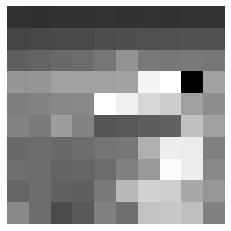

In [60]:
plt.imshow(image_10x10, cmap = 'gray'), plt.axis('off')
plt.show()

In [61]:
image_10x10.shape

(10, 10)

In [62]:
image_10x10.flatten().shape

(100,)

In [63]:
image_color = cv2.imread('plane.jpg',cv2.IMREAD_COLOR)

image_color_10x10 = cv2.resize(image_color, (10,10))

image_color_10x10.flatten().shape

(300,)

In [64]:
image_color_10x10.shape

(10, 10, 3)

In [65]:
image_256x256_gray = cv2.imread('plane.jpg',cv2.IMREAD_GRAYSCALE)

image_256x256_gray.flatten().shape

(258318,)

In [67]:
image_256x256_gray.shape

(381, 678)

### 평균 색을 특성으로 인코딩하기

In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('plane.jpg',cv2.IMREAD_COLOR)

channels = cv2.mean(image_bgr)

observation = np.array([(channels[2], channels[1], channels[0])])

observation

array([[112.50590358, 148.9969224 , 197.6230344 ]])

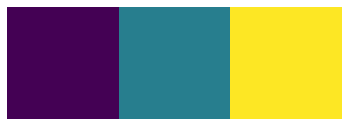

In [70]:
plt.imshow(observation), plt.axis('off')
plt.show()

### 컬러 히스토그램을 특성으로 인코딩하기

In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('plane.jpg',cv2.IMREAD_COLOR)

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

features = []

colors= ('r','g','b')

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], [i], None,[256],[0,256])
    features.extend(histogram)
    
observation = np.array(features).flatten()

observation[0:5]

array([18.,  4., 21., 28., 26.], dtype=float32)

In [73]:
image_rgb[0,0]

array([ 22,  74, 157], dtype=uint8)

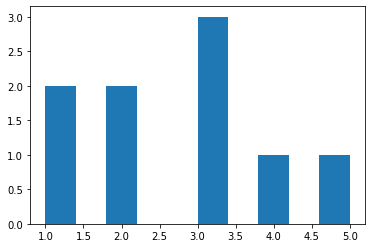

In [74]:
import pandas as pd

data = pd.Series([1,1,2,2,3,3,3,4,5])

data.hist(grid = False)
plt.show()

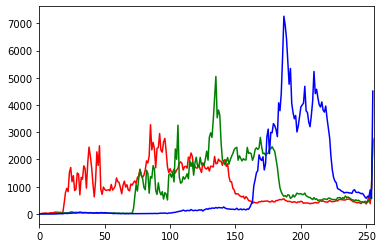

In [75]:
colors = ('r','g','b')

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                            [i],
                            None,
                            [256],
                            [0,256])
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
plt.show()